In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from examples.synthetic_true_model_validation import X2_geo_uncertainty

In [2]:
os.listdir('./results_uniform_noise_xai_predictor/noise-10')

['Coverage-ConformalSHAP+Noise(Level=10)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=100)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=150)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=200)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=50)-uniform_X1_and_X2.pdf',
 'results_100_noise-uniform_X1_and_X2.csv',
 'results_100_true-uniform_X1_and_X2.csv',
 'results_10_noise-uniform_X1_and_X2.csv',
 'results_10_true-uniform_X1_and_X2.csv',
 'results_150_noise-uniform_X1_and_X2.csv',
 'results_150_true-uniform_X1_and_X2.csv',
 'results_200_noise-uniform_X1_and_X2.csv',
 'results_200_true-uniform_X1_and_X2.csv',
 'results_50_noise-uniform_X1_and_X2.csv',
 'results_50_true-uniform_X1_and_X2.csv',
 'results_multi_level_noise-X1_and_X2.csv']

In [3]:
noise_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]

In [4]:
dfs = []

for noise_level in noise_levels:
    file_path = f'./results_uniform_noise_xai_predictor/noise-{noise_level}/results_multi_level_noise-X1_and_X2.csv'
    df = pd.read_csv(file_path)
    df_new = df[['noise_level', 'X1_cover_mean', 'X2_cover_mean']]
    df_new.columns = ['model_noise_level', 'X1_cover', 'X2_cover']
    df_new['xai_noise_level'] = noise_level
    dfs.append(df_new)

combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\1586135325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['xai_noise_level'] = noise_level
C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\1586135325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['xai_noise_level'] = noise_level
C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\1586135325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [5]:
combined_df

,model_noise_level,X1_cover,X2_cover,xai_noise_level
0,10,1.0000,1.0000,1
1,50,0.9996,0.9952,1
2,100,0.9524,0.8624,1
3,150,0.8576,0.7324,1
4,200,0.8744,0.8408,1
...,...,...,...,...
70,10,1.0000,1.0000,50
71,50,1.0000,1.0000,50
72,100,0.9916,0.9816,50
73,150,0.9600,0.9664,50


In [6]:
combined_df.shape

(75, 4)

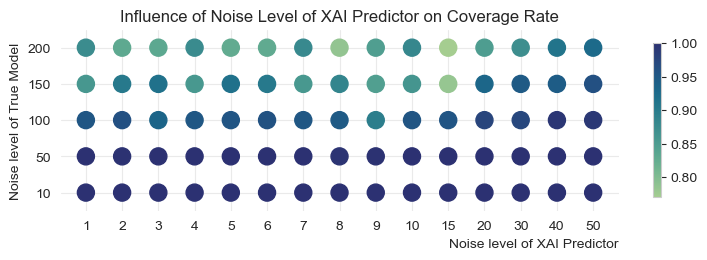

In [8]:
fig, ax = plt.subplots(figsize=(9, 4))

# xai_noise_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
xai_noise_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
model_noise_levels = [10, 50, 100, 150, 200]

y, x = np.meshgrid(range(len(model_noise_levels)), range(len(xai_noise_levels)))

x_ticks, y_ticks = x.flatten(), y.flatten()

ax.set_xticks(range(len(xai_noise_levels)), labels=xai_noise_levels)
ax.set_yticks(range(len(model_noise_levels)), labels=model_noise_levels)

ax.set_frame_on(False)
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

y_shrunk = 0.5
y_lower, y_upper = ax.get_ylim()
ax.set_ylim(y_lower - y_shrunk, y_upper + y_shrunk)

s = ax.scatter(x_ticks, y_ticks, c=combined_df['X1_cover'], cmap='crest', marker='o', s=150)

cbar = plt.colorbar(mappable = s, ax = ax, shrink=0.5)

ax.set_xlabel('Noise level of XAI Predictor', loc='right')
ax.set_ylabel('Noise level of True Model')

ax.set_title('Influence of Noise Level of XAI Predictor on Coverage Rate')

plt.gca().set_aspect('equal')

plt.savefig('./Figure_X_noise_level_XAI_predictor_uniform.pdf', dpi=300, bbox_inches='tight')

# plt.show()

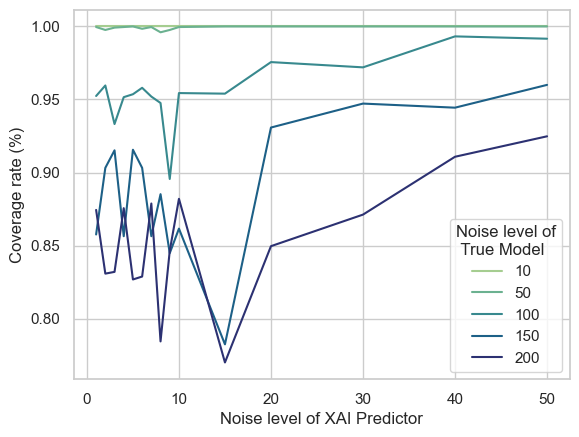

In [9]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(combined_df, x='xai_noise_level', y='X1_cover', hue='model_noise_level', palette='crest')

plt.xlabel('Noise level of XAI Predictor')
plt.ylabel('Coverage rate (%)')

ax.legend(title='Noise level of\n True Model')

plt.savefig('./Figure_X_noise_level_XAI_predictor_uniform_lineplot_X1.pdf', dpi=300, bbox_inches='tight')

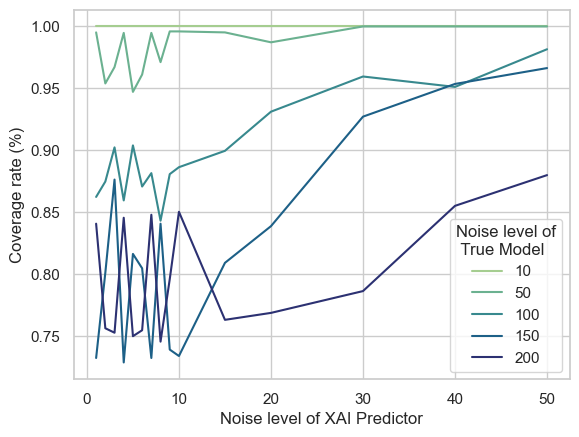

In [10]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(combined_df, x='xai_noise_level', y='X2_cover', hue='model_noise_level', palette='crest')

plt.xlabel('Noise level of XAI Predictor')
plt.ylabel('Coverage rate (%)')

ax.legend(title='Noise level of\n True Model')

plt.savefig('./Figure_X_noise_level_XAI_predictor_uniform_lineplot_X2.pdf', dpi=300, bbox_inches='tight')

In [13]:
noise_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]

In [14]:
dfs = []

for noise_level in noise_levels:
    file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_multi_level_noise-X1_and_X2.csv'
    df = pd.read_csv(file_path)
    df_new = df[['noise_level', 'X1_cover_mean', 'X2_cover_mean']]
    df_new.columns = ['model_noise_level', 'X1_cover', 'X2_cover']
    df_new['xai_noise_level'] = noise_level
    dfs.append(df_new)

combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\2389145573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['xai_noise_level'] = noise_level
C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\2389145573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['xai_noise_level'] = noise_level
C:\Users\Xiayin\AppData\Local\Temp\ipykernel_19908\2389145573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

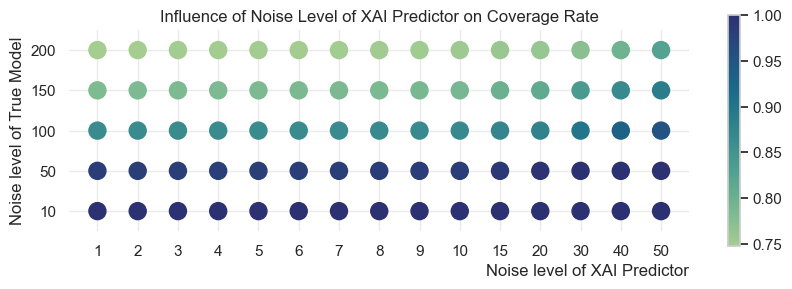

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# xai_noise_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
xai_noise_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
model_noise_levels = [10, 50, 100, 150, 200]

y, x = np.meshgrid(range(len(model_noise_levels)), range(len(xai_noise_levels)))

x_ticks, y_ticks = x.flatten(), y.flatten()

ax.set_xticks(range(len(xai_noise_levels)), labels=xai_noise_levels)
ax.set_yticks(range(len(model_noise_levels)), labels=model_noise_levels)

ax.set_frame_on(False)
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

y_shrunk = 0.5
y_lower, y_upper = ax.get_ylim()
ax.set_ylim(y_lower - y_shrunk, y_upper + y_shrunk)

s = ax.scatter(x_ticks, y_ticks, c=combined_df['X1_cover'], cmap='crest', marker='o', s=150)

cbar = plt.colorbar(mappable = s, ax = ax, shrink=0.5)

ax.set_xlabel('Noise level of XAI Predictor', loc='right')
ax.set_ylabel('Noise level of True Model')

ax.set_title('Influence of Noise Level of XAI Predictor on Coverage Rate')

plt.gca().set_aspect('equal')

plt.savefig('./Figure_X_noise_level_XAI_predictor_gaussian_re.pdf', dpi=300, bbox_inches='tight')

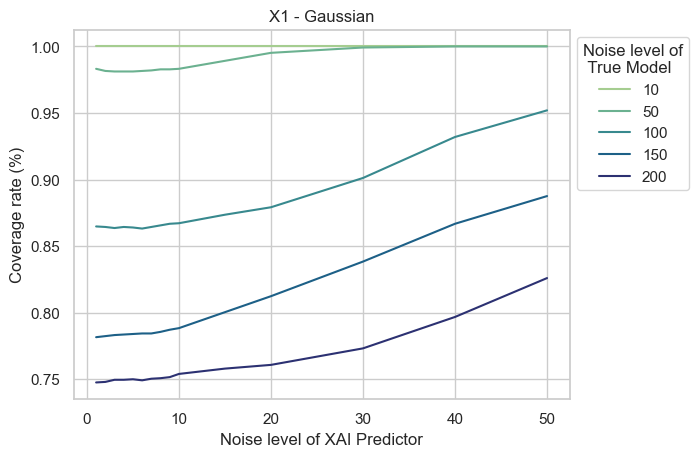

In [16]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(combined_df, x='xai_noise_level', y='X1_cover', hue='model_noise_level', palette='crest')

plt.xlabel('Noise level of XAI Predictor')
plt.ylabel('Coverage rate (%)')

plt.title('X1 - Gaussian')

ax.legend(title='Noise level of\n True Model', bbox_to_anchor=(1, 1))

plt.savefig('./Figure_X_noise_level_XAI_predictor_gaussian_lineplot_X1_re.pdf', dpi=300, bbox_inches='tight')

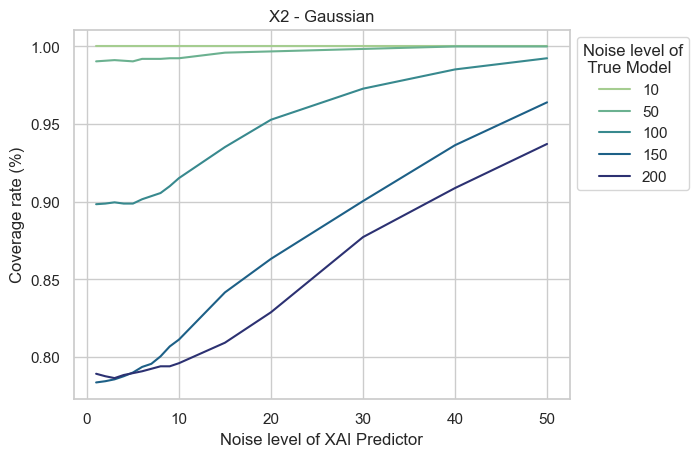

In [17]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(combined_df, x='xai_noise_level', y='X2_cover', hue='model_noise_level', palette='crest')

plt.xlabel('Noise level of XAI Predictor')
plt.ylabel('Coverage rate (%)')

ax.legend(title='Noise level of\n True Model', bbox_to_anchor=(1, 1))

plt.title('X2 - Gaussian')

plt.savefig('./Figure_X_noise_level_XAI_predictor_gaussian_lineplot_X2_re.pdf', dpi=300, bbox_inches='tight')

In [18]:
model_noise_levels = [10, 50, 100, 150, 200]

In [20]:
colors = ['#a5cd90', '#6bb190', '#38898e', '#1d6087', '#2c3172']

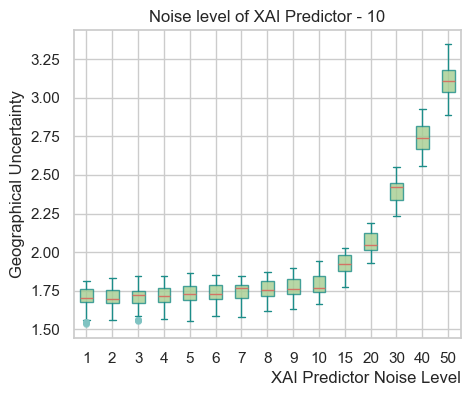

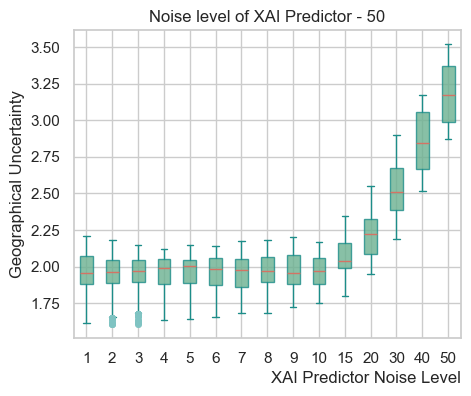

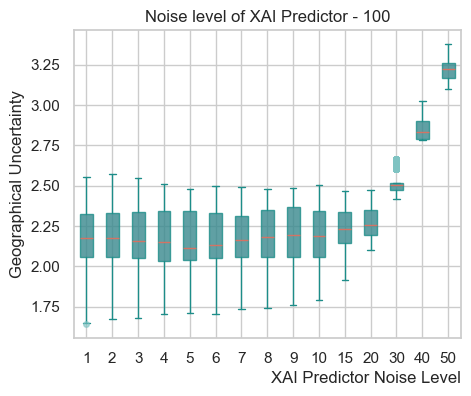

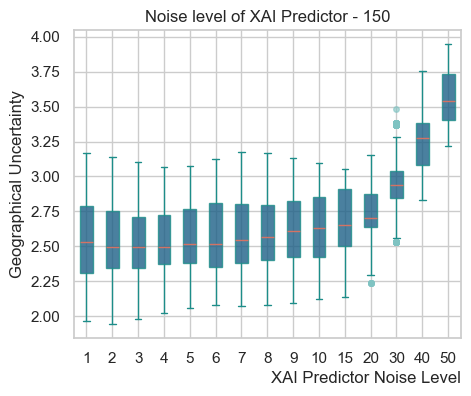

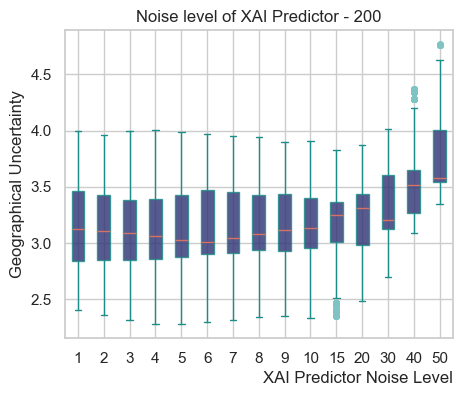

In [53]:
for i, model_noise_level in enumerate(model_noise_levels):
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-gaussian_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_geo_uncertainty']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.boxplot(dfs,
                patch_artist=True,
                tick_labels=noise_levels,
                whiskerprops={'color': '#1d8d89'},
                capprops={'color': '#1d8d89'},
                boxprops={'facecolor': colors[i], 'alpha': 0.8, 'edgecolor': '#1d8d89'},
                flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#7fc3c2', 'alpha': 0.6, 'markeredgecolor': '#7fc3c2', 'linewidth': 0.5},
                medianprops={'color': '#d47364'})

    plt.xlabel('XAI Predictor Noise Level', loc='right')
    plt.ylabel('Geographical Uncertainty')
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_gaussian_noise_xai_predictor/figures/gaussian_noise-{model_noise_level}.pdf', bbox_inches='tight', dpi=400)

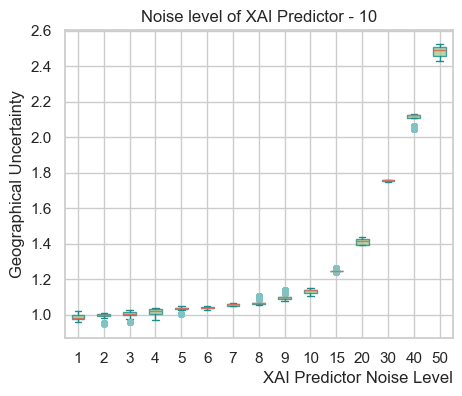

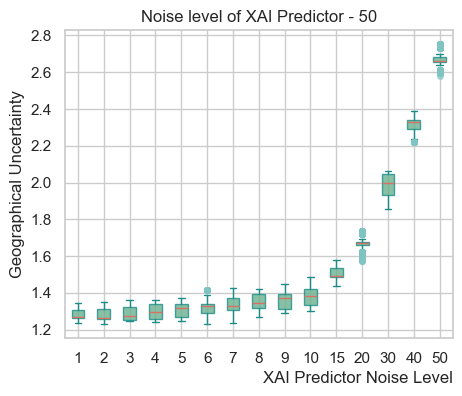

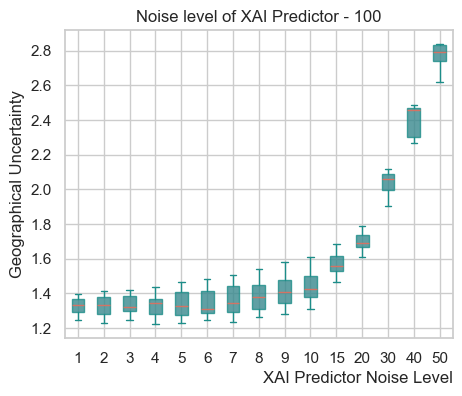

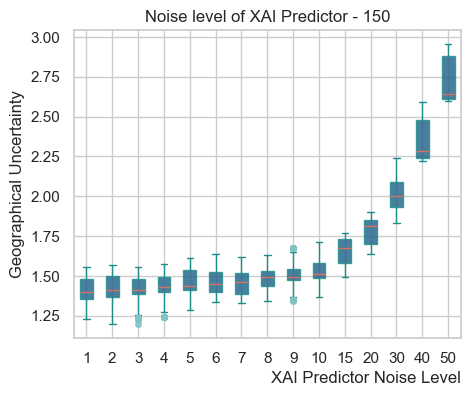

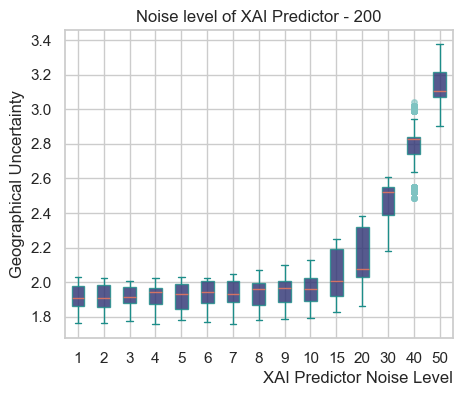

In [61]:
for i, model_noise_level in enumerate(model_noise_levels):
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-gaussian_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X2_geo_uncertainty']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.boxplot(dfs,
                patch_artist=True,
                tick_labels=noise_levels,
                whiskerprops={'color': '#1d8d89'},
                capprops={'color': '#1d8d89'},
                boxprops={'facecolor': colors[i], 'alpha': 0.8, 'edgecolor': '#1d8d89'},
                flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#7fc3c2', 'alpha': 0.6, 'markeredgecolor': '#7fc3c2', 'linewidth': 0.5},
                medianprops={'color': '#d47364'})

    plt.xlabel('XAI Predictor Noise Level', loc='right')
    plt.ylabel('Geographical Uncertainty')
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_gaussian_noise_xai_predictor/figures/gaussian_noise-{model_noise_level}_X2.pdf', bbox_inches='tight', dpi=400)

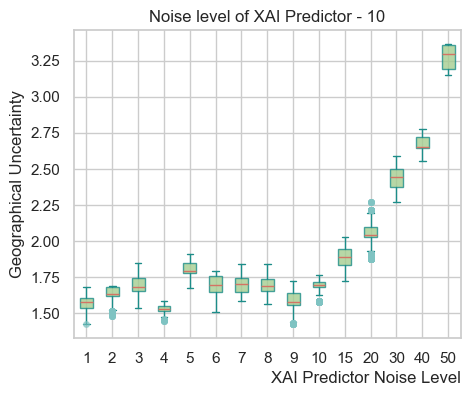

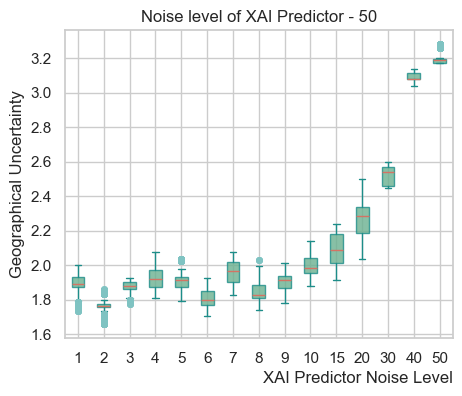

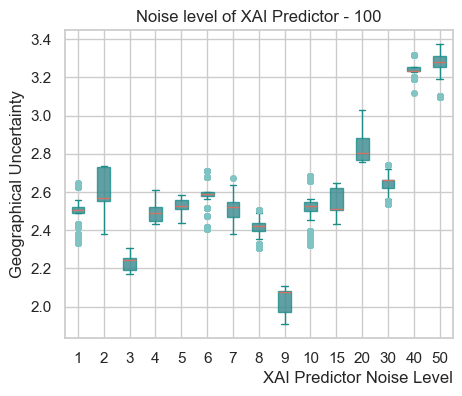

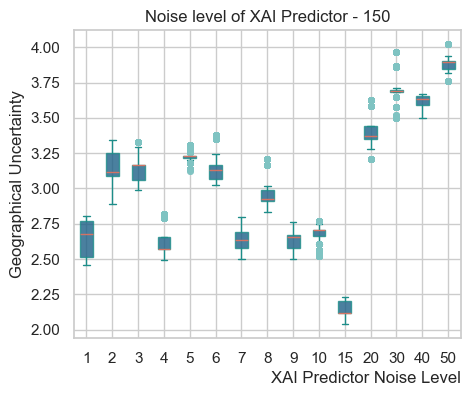

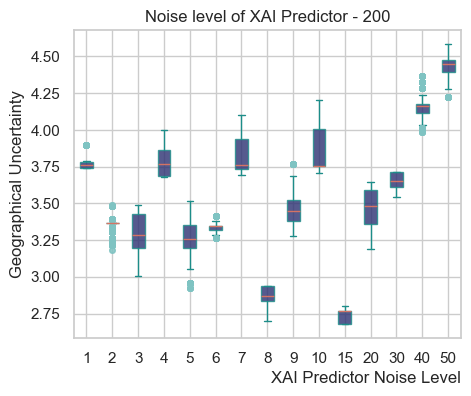

In [59]:
for i, model_noise_level in enumerate(model_noise_levels):
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_uniform_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-uniform_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_geo_uncertainty']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.boxplot(dfs,
                patch_artist=True,
                tick_labels=noise_levels,
                whiskerprops={'color': '#1d8d89'},
                capprops={'color': '#1d8d89'},
                boxprops={'facecolor': colors[i], 'alpha': 0.8, 'edgecolor': '#1d8d89'},
                flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#7fc3c2', 'alpha': 0.6, 'markeredgecolor': '#7fc3c2', 'linewidth': 0.5},
                medianprops={'color': '#d47364'})

    plt.xlabel('XAI Predictor Noise Level', loc='right')
    plt.ylabel('Geographical Uncertainty')
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_uniform_noise_xai_predictor/figures/uniform_noise-{model_noise_level}.pdf', bbox_inches='tight', dpi=400)

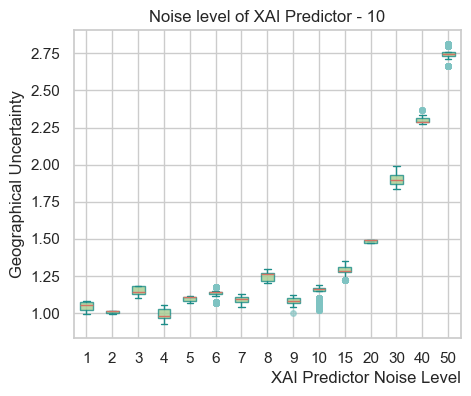

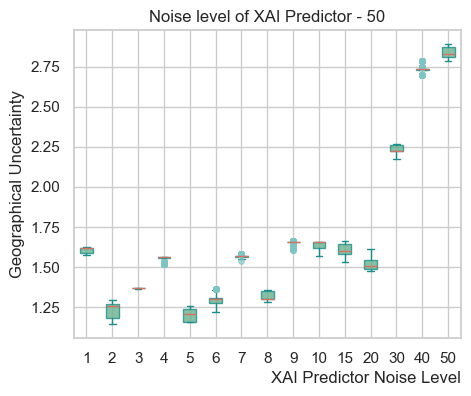

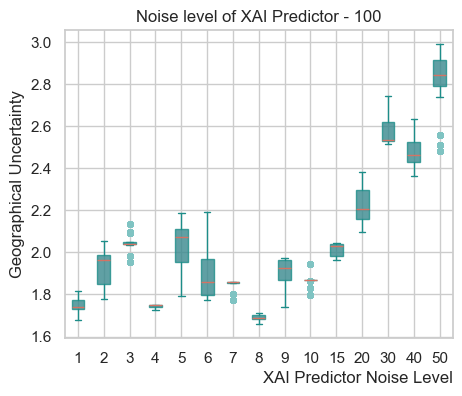

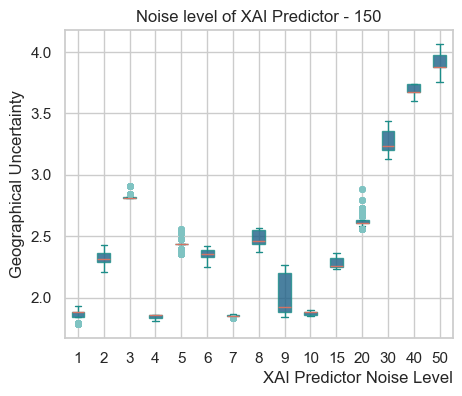

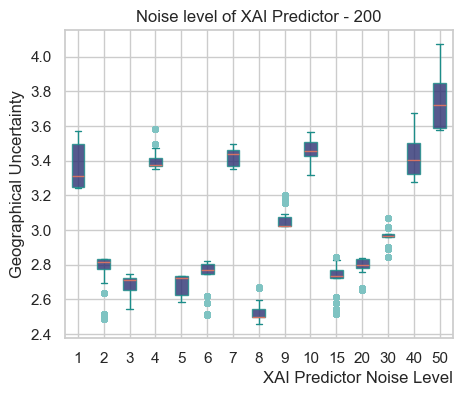

In [62]:
for i, model_noise_level in enumerate(model_noise_levels):
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_uniform_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-uniform_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_geo_uncertainty']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.boxplot(dfs,
                patch_artist=True,
                tick_labels=noise_levels,
                whiskerprops={'color': '#1d8d89'},
                capprops={'color': '#1d8d89'},
                boxprops={'facecolor': colors[i], 'alpha': 0.8, 'edgecolor': '#1d8d89'},
                flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#7fc3c2', 'alpha': 0.6, 'markeredgecolor': '#7fc3c2', 'linewidth': 0.5},
                medianprops={'color': '#d47364'})

    plt.xlabel('XAI Predictor Noise Level', loc='right')
    plt.ylabel('Geographical Uncertainty')
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_uniform_noise_xai_predictor/figures/uniform_noise-{model_noise_level}_X2.pdf', bbox_inches='tight', dpi=400)

In [57]:
os.listdir('./results_uniform_noise_xai_predictor/noise-1/')

['Coverage-ConformalSHAP+Noise(Level=10)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=100)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=150)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=200)-uniform_X1_and_X2.pdf',
 'Coverage-ConformalSHAP+Noise(Level=50)-uniform_X1_and_X2.pdf',
 'results_100_noise-uniform_X1_and_X2.csv',
 'results_100_true-uniform_X1_and_X2.csv',
 'results_10_noise-uniform_X1_and_X2.csv',
 'results_10_true-uniform_X1_and_X2.csv',
 'results_150_noise-uniform_X1_and_X2.csv',
 'results_150_true-uniform_X1_and_X2.csv',
 'results_200_noise-uniform_X1_and_X2.csv',
 'results_200_true-uniform_X1_and_X2.csv',
 'results_50_noise-uniform_X1_and_X2.csv',
 'results_50_true-uniform_X1_and_X2.csv',
 'results_multi_level_noise-X1_and_X2.csv']

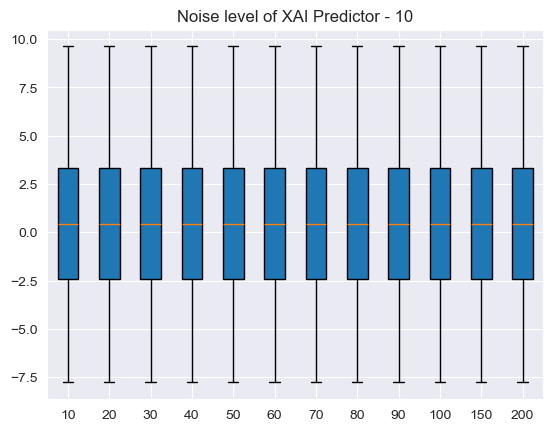

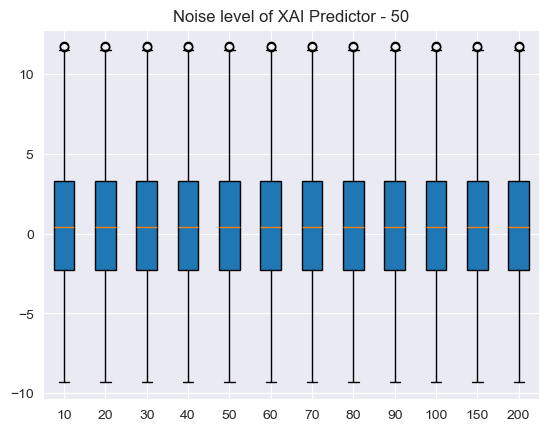

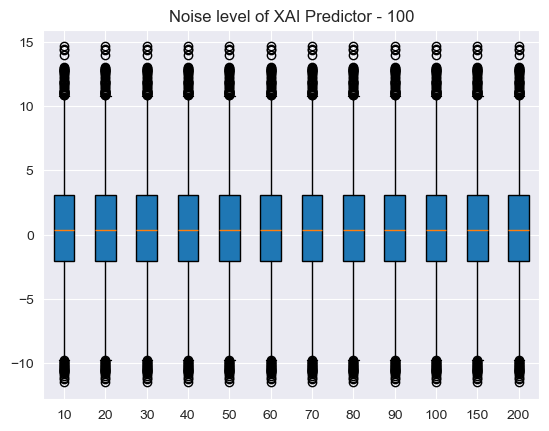

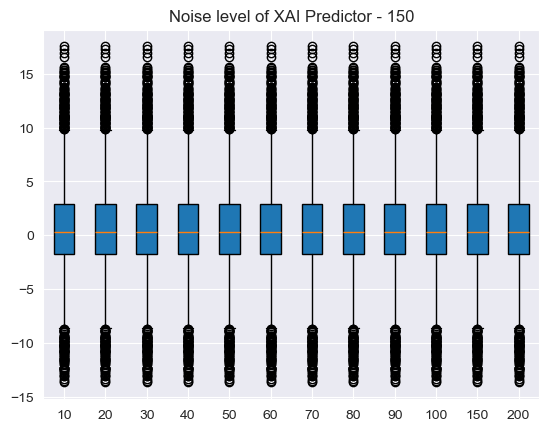

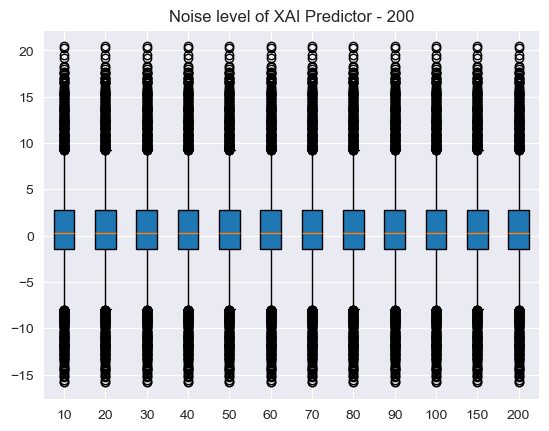

In [9]:
for model_noise_level in model_noise_levels:
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-gaussian_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_shap']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots()
    plt.boxplot(dfs, patch_artist=True, tick_labels=noise_levels)
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_gaussian_noise_xai_predictor/figures/SHAP_noise-{model_noise_level}.png', bbox_inches='tight', dpi=400)

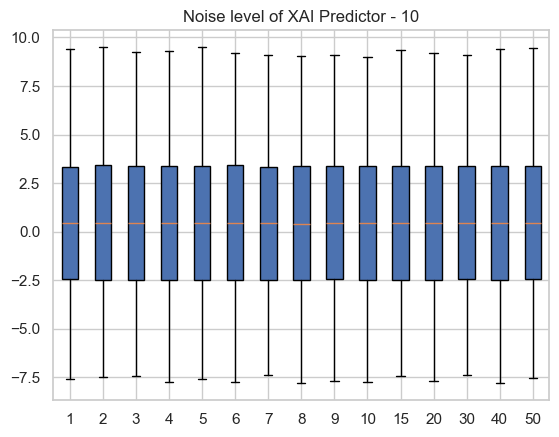

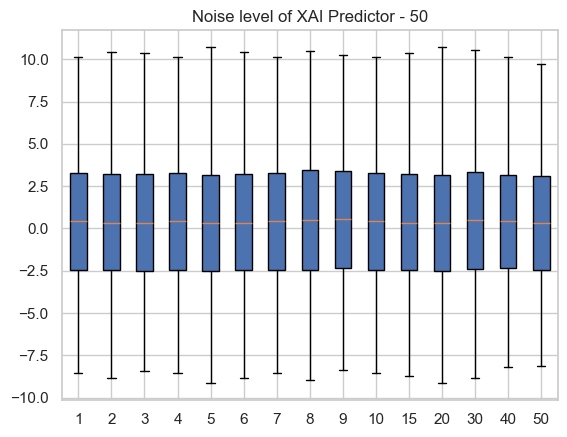

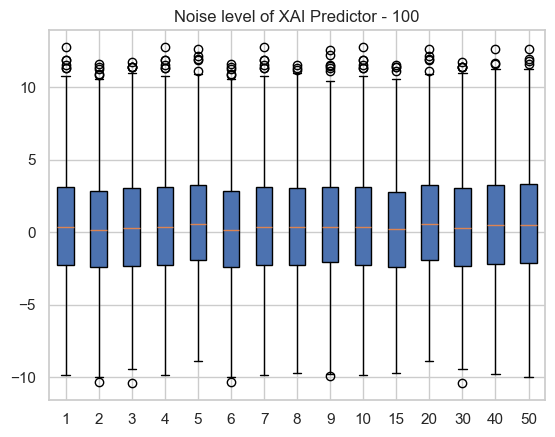

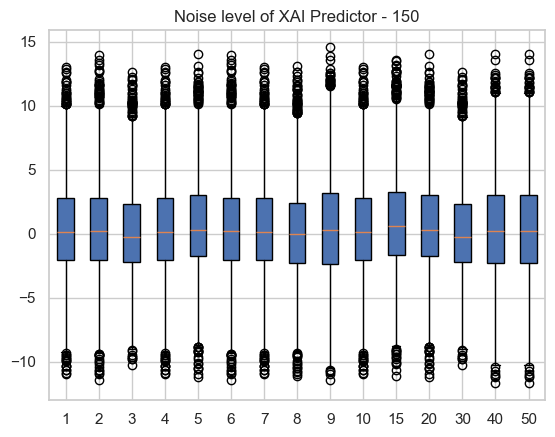

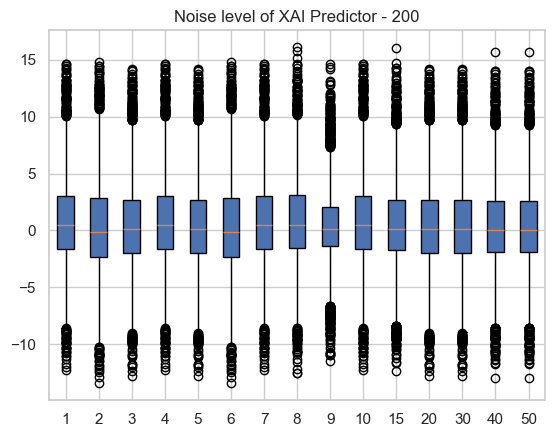

In [60]:
for model_noise_level in model_noise_levels:
    dfs = []
    for noise_level in noise_levels:
        file_path = f'./results_uniform_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-uniform_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_shap']
        dfs.append(X1_geo_uncertainty.values)
    fig, ax = plt.subplots()
    plt.boxplot(dfs, patch_artist=True, tick_labels=noise_levels)
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    plt.savefig(f'./results_uniform_noise_xai_predictor/figures/SHAP_noise-{model_noise_level}.png', bbox_inches='tight', dpi=400)

In [88]:
model_noise_levels = [10]

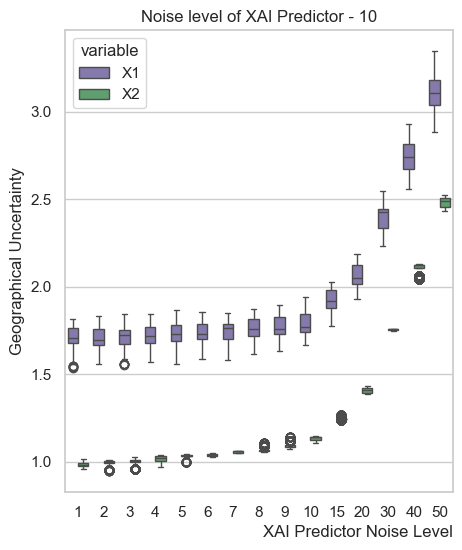

In [99]:
# sns.set_theme(style='whitegrid')

for i, model_noise_level in enumerate(model_noise_levels):
    xai_noise_level_list = []
    variable_list = []
    geo_uncertainty_list = []

    for noise_level in noise_levels:

        file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_{model_noise_level}_noise-gaussian_X1_and_X2.csv'
        df = pd.read_csv(file_path)
        X1_geo_uncertainty = df['X1_geo_uncertainty']
        X2_geo_uncertainty = df['X2_geo_uncertainty']
        for j in range(X1_geo_uncertainty.shape[0]):
            xai_noise_level_list.append(noise_level)
            variable_list.append('X1')
            geo_uncertainty_list.append(X1_geo_uncertainty.values[j])
        for k in range(X2_geo_uncertainty.shape[0]):
            xai_noise_level_list.append(noise_level)
            variable_list.append('X2')
            geo_uncertainty_list.append(X2_geo_uncertainty.values[k])

    df_full = {'xai_noise_level': xai_noise_level_list, 'variable': variable_list, 'geo_uncertainty': geo_uncertainty_list}

    df_full = pd.DataFrame(df_full)

    fig, ax = plt.subplots(figsize=(5, 6))

    sns.boxplot(x='xai_noise_level', y='geo_uncertainty',
            hue='variable', palette=["m", "g"],
            data=df_full)

    plt.xlabel('XAI Predictor Noise Level', loc='right')
    plt.ylabel('Geographical Uncertainty')
    plt.title(f'Noise level of XAI Predictor - {model_noise_level}')
    # plt.savefig(f'./results_gaussian_noise_xai_predictor/figures/gaussian_noise-{model_noise_level}_full.pdf', bbox_inches='tight', dpi=400)

In [92]:
tips = sns.load_dataset('tips')

In [82]:
data_full = []

for noise_level in noise_levels:
    dfs = []
    file_path = f'./results_gaussian_noise_xai_predictor/noise-{noise_level}/results_10_noise-gaussian_X1_and_X2.csv'
    df = pd.read_csv(file_path)
    X1_geo_uncertainty = df['X1_geo_uncertainty']
    X2_geo_uncertainty = df['X2_geo_uncertainty']
    for i in range(X1_geo_uncertainty.shape[0]):
        dfs.append([noise_level, 'X1', X1_geo_uncertainty.values[i]])
        dfs.append([noise_level, 'X2', X2_geo_uncertainty.values[i]])
    data_full.extend(dfs)

data_full = np.array(data_full)

df_full = {'xai_noise_level': data_full[:, 0], 'variable': data_full[:, 1], 'geo_uncertainty': data_full[:, 2]}


In [83]:
data_full

array([['1', 'X1', '1.5334846341631243'],
       ['1', 'X2', '0.960481013293496'],
       ['1', 'X1', '1.540699363853043'],
       ...,
       ['50', 'X2', '2.430391769229992'],
       ['50', 'X1', '3.2426469956731268'],
       ['50', 'X2', '2.430391769229992']], dtype='<U32')

In [84]:
df_full

{'xai_noise_level': array(['1', '1', '1', ..., '50', '50', '50'], dtype='<U32'),
 'variable': array(['X1', 'X2', 'X1', ..., 'X2', 'X1', 'X2'], dtype='<U32'),
 'geo_uncertainty': array(['1.5334846341631243', '0.960481013293496', '1.540699363853043',
        ..., '2.430391769229992', '3.2426469956731268',
        '2.430391769229992'], dtype='<U32')}

In [85]:
df_full = pd.DataFrame(df_full)

In [86]:
df_full

,xai_noise_level,variable,geo_uncertainty
0,1,X1,1.5334846341631243
1,1,X2,0.960481013293496
2,1,X1,1.540699363853043
3,1,X2,0.960481013293496
4,1,X1,1.5454789372800244
...,...,...,...
74995,50,X2,2.430391769229992
74996,50,X1,3.2426469956731268
74997,50,X2,2.430391769229992
74998,50,X1,3.2426469956731268
